In [3]:
# 1. Install pingouin (statistics library)
%pip install pingouin

# 2. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

# 3. Load the data you just saved
df = pd.read_csv('cleaned_world_bank_data.csv')

# 4. Check if it loaded correctly
print("Data loaded successfully!")
display(df.head())

Note: you may need to restart the kernel to use updated packages.
Data loaded successfully!


,country,agricultural_land_percent,forest_land_percent,trade_in_services_percent,control_of_corruption_estimate,access_to_electricity_percent,renewvable_energy_consumption_percent,co2_emisions,inflation_annual_percent,goverment_effectiveness_estimate,...,government_health_expenditure_percent,birth_rate,death_rate,life_expectancy_at_birth,population,voice_and_accountability_estimate,intentional_homicides,income_group,continent,year
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.340,31.921,32.535,8622466.0,NaN,NaN,Low,Asia,1960
1,Afghanistan,57.878356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.443,31.349,33.068,8790140.0,NaN,NaN,Low,Asia,1961
2,Afghanistan,57.955016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.570,30.845,33.547,8969047.0,NaN,NaN,Low,Asia,1962
3,Afghanistan,58.031676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.703,30.359,34.016,9157465.0,NaN,NaN,Low,Asia,1963
4,Afghanistan,58.116002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.831,29.867,34.494,9355514.0,NaN,NaN,Low,Asia,1964


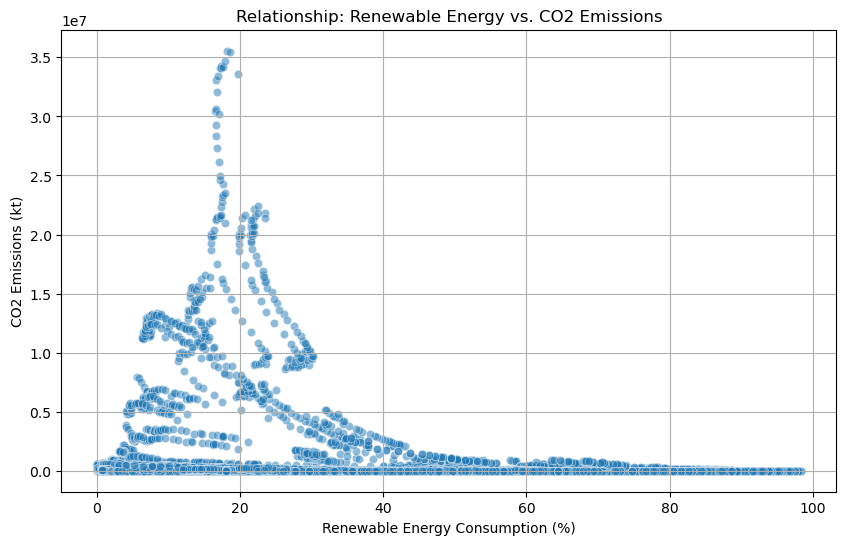

,n,r,CI95%,p-val,power
spearman,6982,-0.273649,"[-0.3, -0.25]",3.693765e-120,1.0


In [4]:
# === RQ 1: Renewable Energy vs CO2 Emissions ===

# 1. Filter the data: Select the columns and remove missing values (NaN)
rq1_data = df[['renewvable_energy_consumption_percent', 'co2_emisions']].dropna()

# 2. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rq1_data, x='renewvable_energy_consumption_percent', y='co2_emisions', alpha=0.5)
plt.title('Relationship: Renewable Energy vs. CO2 Emissions')
plt.xlabel('Renewable Energy Consumption (%)')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()

# 3. Statistical Test (Spearman Correlation)
# We use Spearman because CO2 data usually has extreme outliers (skewed)
stats = pg.corr(rq1_data['renewvable_energy_consumption_percent'], rq1_data['co2_emisions'], method='spearman')
display(stats)

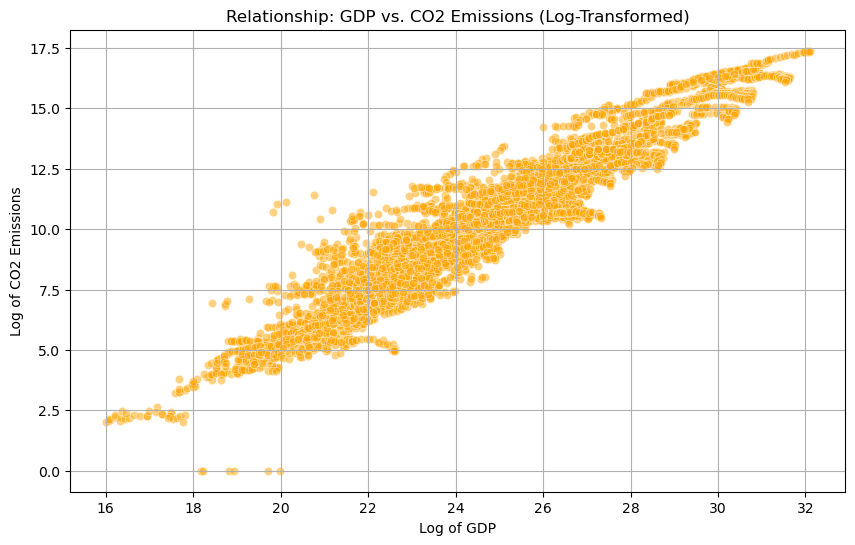

,n,r,CI95%,p-val,power
spearman,6837,0.953982,"[0.95, 0.96]",0.0,1.0


In [5]:
# === RQ 2: GDP vs CO2 Emissions ===

# 1. Filter the data
rq2_data = df[['gdp_current_us', 'co2_emisions']].dropna()

# 2. Log Transformation (to handle extreme values)
# We add +1 to avoid errors if any value is 0
rq2_data['log_gdp'] = np.log(rq2_data['gdp_current_us'] + 1)
rq2_data['log_co2'] = np.log(rq2_data['co2_emisions'] + 1)

# 3. Create the Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rq2_data, x='log_gdp', y='log_co2', alpha=0.5, color='orange')
plt.title('Relationship: GDP vs. CO2 Emissions (Log-Transformed)')
plt.xlabel('Log of GDP')
plt.ylabel('Log of CO2 Emissions')
plt.grid(True)
plt.show()

# 4. Statistical Test (Spearman Correlation)
stats_rq2 = pg.corr(rq2_data['gdp_current_us'], rq2_data['co2_emisions'], method='spearman')
display(stats_rq2)

Images saved to your folder!


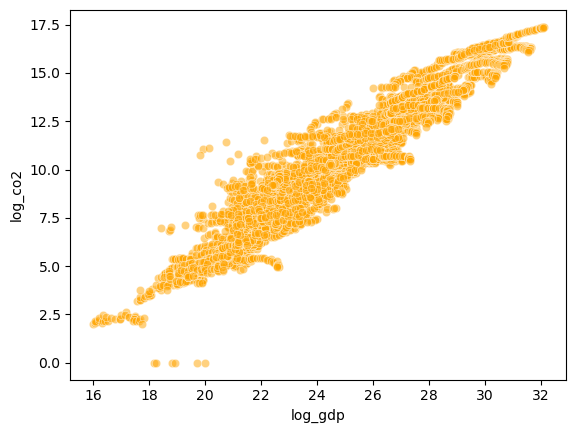

In [6]:
# Save the plots as image files
fig1 = sns.scatterplot(data=rq1_data, x='renewvable_energy_consumption_percent', y='co2_emisions', alpha=0.5).get_figure()
fig1.savefig("graph_renewables_vs_co2.png")

plt.clf() # Clear the plot area

fig2 = sns.scatterplot(data=rq2_data, x='log_gdp', y='log_co2', alpha=0.5, color='orange').get_figure()
fig2.savefig("graph_gdp_vs_co2.png")

print("Images saved to your folder!")